In [29]:
!pip install wordcloud

     -------------------------------------- 152.5/152.5 kB 4.6 MB/s eta 0:00:00


In [35]:
#import module
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import re
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB 

In [16]:
DATA_PATH = 'data/WELFake_Dataset.csv'

In [17]:
news_df = pd.read_csv(DATA_PATH)
news_df.head(5)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [18]:
#pre-processing
# dropping the duplicate values
news_df.drop_duplicates(inplace=True)
news_df.dropna(inplace=True, axis=0)

train_df , test_df = train_test_split(news_df, test_size=0.2 ,random_state=42)

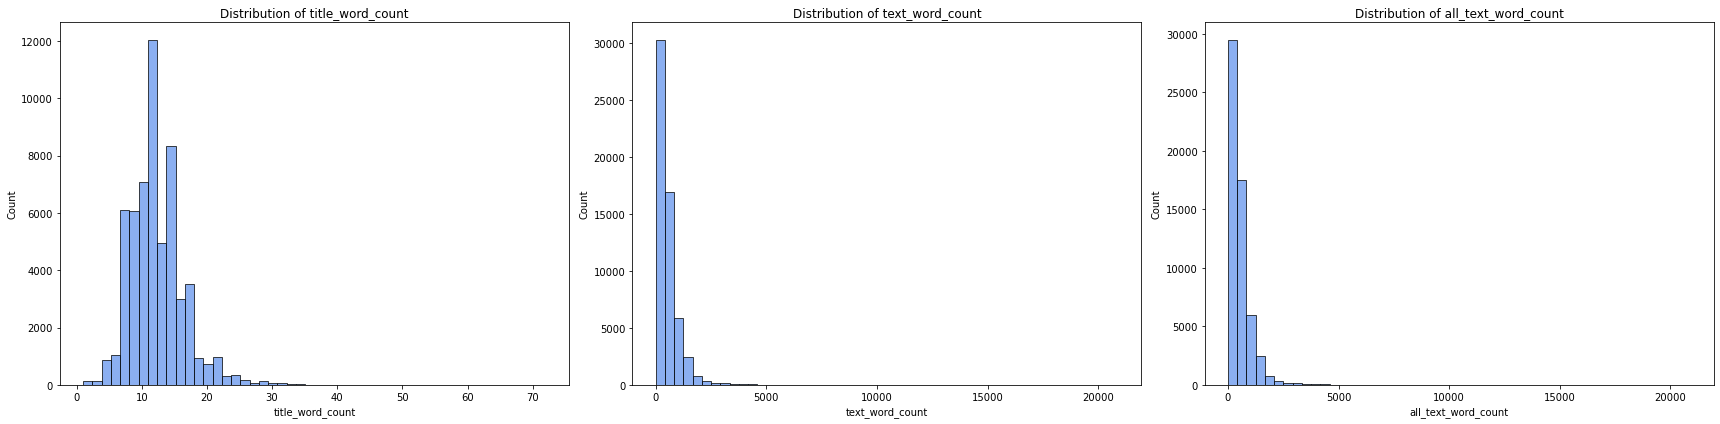

In [24]:
#feature engineering & see data distribution
train_df['title_word_count']=train_df['title'].apply(lambda x:len(x.split()))
train_df['text_word_count']=train_df['text'].apply(lambda x:len(x.split()))
train_df['all_text']=train_df['title']+"\n"+train_df['text']
train_df['all_text_word_count']=train_df['all_text'].apply(lambda x:len(x.split()))
feature_cols = ['title_word_count', 'text_word_count','all_text_word_count']

plt.figure(figsize=(24,6))
for i,col in enumerate(feature_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(data=train_df,x=col,bins=50,color='#6495ED')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

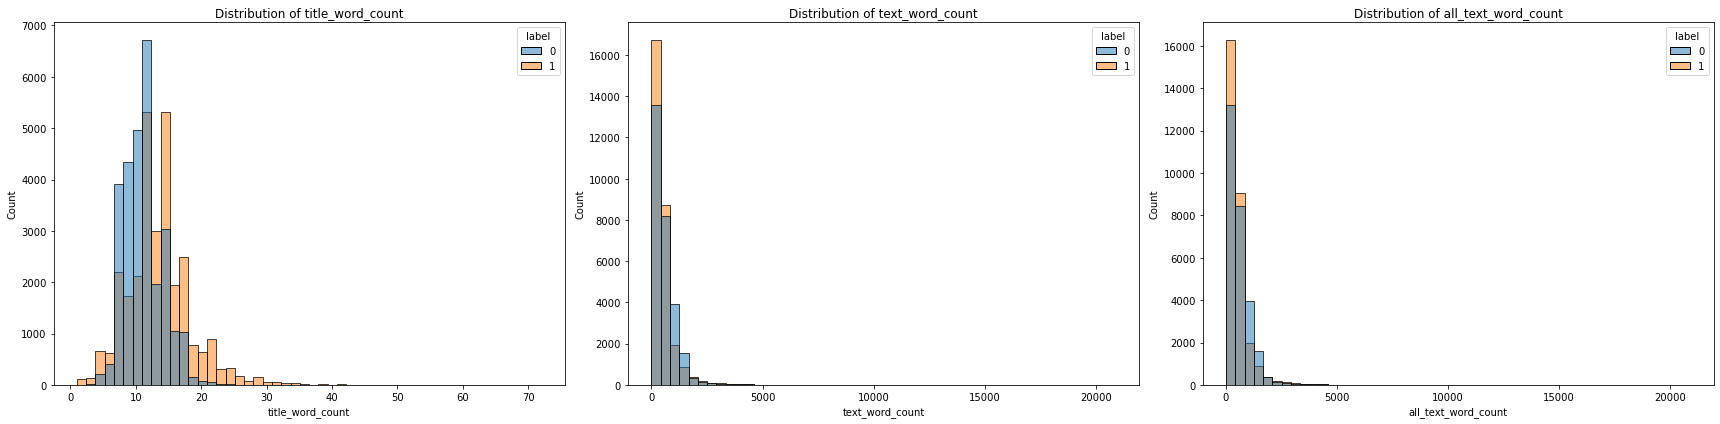

In [28]:
plt.figure(figsize=(24,6))
for i,col in enumerate(feature_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(data=train_df,x=col,hue='label',bins=50)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [36]:
#true dataset info
text_list=train_df.loc[train_df['label']==0, 'all_text'].tolist()
text=""
for sent in text_list:
    text=re.sub("[^A-Za-z0-9]"," ",text)
    text+=sent    

stopwords=set(STOPWORDS)
wordcloud = WordCloud(width=1200,height=700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (12, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
X_train, X_test = (train_df['text'], test_df['text'])
y_train, y_test = (train_df['label'], test_df['label'])

tfidf_vect = TfidfVectorizer(stop_words="english",max_df=0.7)
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

In [ ]:
X_train_tfidf[:1]

In [ ]:
# using Multinomial Naive Bayes to predict fake news

nb_clasif = MultinomialNB()

nb_clasif.fit(X_train_tfidf, y_train)
y_pred = nb_clasif.predict(X_test_tfidf)

In [ ]:
print(f1_score(y_test,y_pred))

score = accuracy_score(y_test,y_pred)
print(score) 